## 1. Import libraries and dataframe

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [6]:
path = r'C:\Users\kshifera\Desktop\CF_Course\Specialization\Project\Data Sets'

In [7]:
#import dataframe
station = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))

In [131]:
#check
pd.set_option('display.max_columns', None)
station.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,7.7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,5.4,0.83,1.0161,0.12,0.08,0,0.0,10.0,7.0,11.5,8,0.91,0.00,0,0.8,-0.3,1.6,7,0.91,1.0010,0.13,0.22,0,0.0,10.6,9.4,8.3,2.9,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.4,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,8.7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.0,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,0.20,0.10,0,0.0,6.9,1.1,10.4,8,4.0,0.98,0.9978,0.04,1.14,0,0.0,4.9,3.8,5.9,3,2.6,0.73,1.0152,7.1,7.8,4,4.5,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,3.8,0.76,1.0169,1.54,0.44,10.0,7.8,12.2,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84

In [117]:
#Reduce the dataset to the year 1995
dfred = station.loc[(station['DATE'] >= 19950101) & (station['DATE'] <19960101)]  # 1995
dfred

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
12784,19950101,1,7,2.1,0.75,1.0067,0.17,0.51,0,0.6,...,5,0.78,1.0231,0.27,0.20,0,1.4,4.8,1.7,8.0
12785,19950102,1,6,2.1,0.79,1.0174,0.35,0.19,3,1.6,...,5,0.87,1.0288,0.28,0.55,0,1.0,5.2,1.5,7.5
12786,19950103,1,7,2.1,0.87,1.0297,0.37,0.05,7,1.7,...,6,0.84,1.0165,0.22,1.13,0,2.6,6.3,2.5,10.1
12787,19950104,1,3,2.1,0.81,1.0314,0.46,0.00,5,1.7,...,8,0.93,1.0115,0.13,0.45,0,0.0,9.4,7.0,11.7
12788,19950105,1,5,2.1,0.73,1.0285,0.52,0.00,4,3.9,...,5,0.79,1.0110,0.33,0.42,0,1.9,9.5,8.7,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13144,19951227,12,8,2.1,0.92,1.0140,0.26,0.00,17,0.0,...,4,0.66,1.0100,0.28,0.00,0,1.8,2.0,-2.1,6.0
13145,19951228,12,6,2.1,0.81,1.0156,0.28,0.00,14,0.0,...,6,0.60,1.0083,0.15,0.00,0,0.0,4.8,2.6,6.2
13146,19951229,12,8,2.1,0.80,1.0160,0.22,0.08,12,0.0,...,6,0.69,0.9990,0.17,0.28,0,0.9,6.8,4.7,8.0
13147,19951230,12,6,2.1,0.88,1.0049,0.18,1.06,11,0.0,...,7,0.84,0.9819,0.22,0.23,0,0.1,8.5,6.3,10.7


In [118]:
#drop the 'DATE' and 'MONTH' columns
dfdr = dfred.drop(['DATE','MONTH'], axis=1)
dfdr

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
12784,7,2.1,0.75,1.0067,0.17,0.51,0,0.6,2.6,0.1,...,5,0.78,1.0231,0.27,0.20,0,1.4,4.8,1.7,8.0
12785,6,2.1,0.79,1.0174,0.35,0.19,3,1.6,-0.5,-1.6,...,5,0.87,1.0288,0.28,0.55,0,1.0,5.2,1.5,7.5
12786,7,2.1,0.87,1.0297,0.37,0.05,7,1.7,-1.5,-6.1,...,6,0.84,1.0165,0.22,1.13,0,2.6,6.3,2.5,10.1
12787,3,2.1,0.81,1.0314,0.46,0.00,5,1.7,-5.0,-7.2,...,8,0.93,1.0115,0.13,0.45,0,0.0,9.4,7.0,11.7
12788,5,2.1,0.73,1.0285,0.52,0.00,4,3.9,-6.6,-9.8,...,5,0.79,1.0110,0.33,0.42,0,1.9,9.5,8.7,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13144,8,2.1,0.92,1.0140,0.26,0.00,17,0.0,-2.0,-4.2,...,4,0.66,1.0100,0.28,0.00,0,1.8,2.0,-2.1,6.0
13145,6,2.1,0.81,1.0156,0.28,0.00,14,0.0,-4.2,-5.2,...,6,0.60,1.0083,0.15,0.00,0,0.0,4.8,2.6,6.2
13146,8,2.1,0.80,1.0160,0.22,0.08,12,0.0,-4.0,-4.7,...,6,0.69,0.9990,0.17,0.28,0,0.9,6.8,4.7,8.0
13147,6,2.1,0.88,1.0049,0.18,1.06,11,0.0,-1.9,-4.4,...,7,0.84,0.9819,0.22,0.23,0,0.1,8.5,6.3,10.7


In [119]:
dfdr.isnull().sum()

BASEL_cloud_cover         0
BASEL_wind_speed          0
BASEL_humidity            0
BASEL_pressure            0
BASEL_global_radiation    0
                         ..
VALENTIA_snow_depth       0
VALENTIA_sunshine         0
VALENTIA_temp_mean        0
VALENTIA_temp_min         0
VALENTIA_temp_max         0
Length: 168, dtype: int64

## 2. Scale

In [123]:
#scale
scaler = StandardScaler()

In [125]:
df_scaled = pd.DataFrame(scaler.fit_transform(dfdr), columns = cols )
df_scaled.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0.582641,-4.440892e-16,-0.158869,-1.463912,-1.218375,0.368207,-0.226974,-0.888424,-1.108230,-0.993527,...,-0.399480,-0.730886,0.725643,-0.962718,-0.307761,0.0,-0.556013,-1.549554,-1.551980,-1.339808
1,0.130164,-4.440892e-16,0.230306,-0.069685,-1.022890,-0.139425,1.475332,-0.648221,-1.541468,-1.256487,...,-0.399480,0.464812,1.193883,-0.951265,0.177448,0.0,-0.654338,-1.456404,-1.597602,-1.445184
2,0.582641,-4.440892e-16,1.008656,1.533026,-1.001170,-0.361514,3.745074,-0.624200,-1.681222,-1.952558,...,0.112135,0.066246,0.183470,-1.019984,0.981510,0.0,-0.261035,-1.200239,-1.369490,-0.897228
3,-1.227264,-4.440892e-16,0.424894,1.754539,-0.903427,-0.440831,2.610203,-0.624200,-2.170361,-2.122708,...,1.135363,1.261944,-0.227267,-1.123062,0.038817,0.0,-0.900153,-0.478322,-0.342982,-0.560024
4,-0.322312,-4.440892e-16,-0.353456,1.376664,-0.838265,-0.440831,2.042768,-0.095752,-2.393967,-2.524882,...,-0.399480,-0.598031,-0.268341,-0.894000,-0.002773,0.0,-0.433105,-0.455034,0.044810,-0.538949


In [126]:
df_scaled.shape

(365, 168)

In [139]:
#define variable 'cols'
cols = df_scaled.columns

## 3. Clustering

### 3.1. Single Method

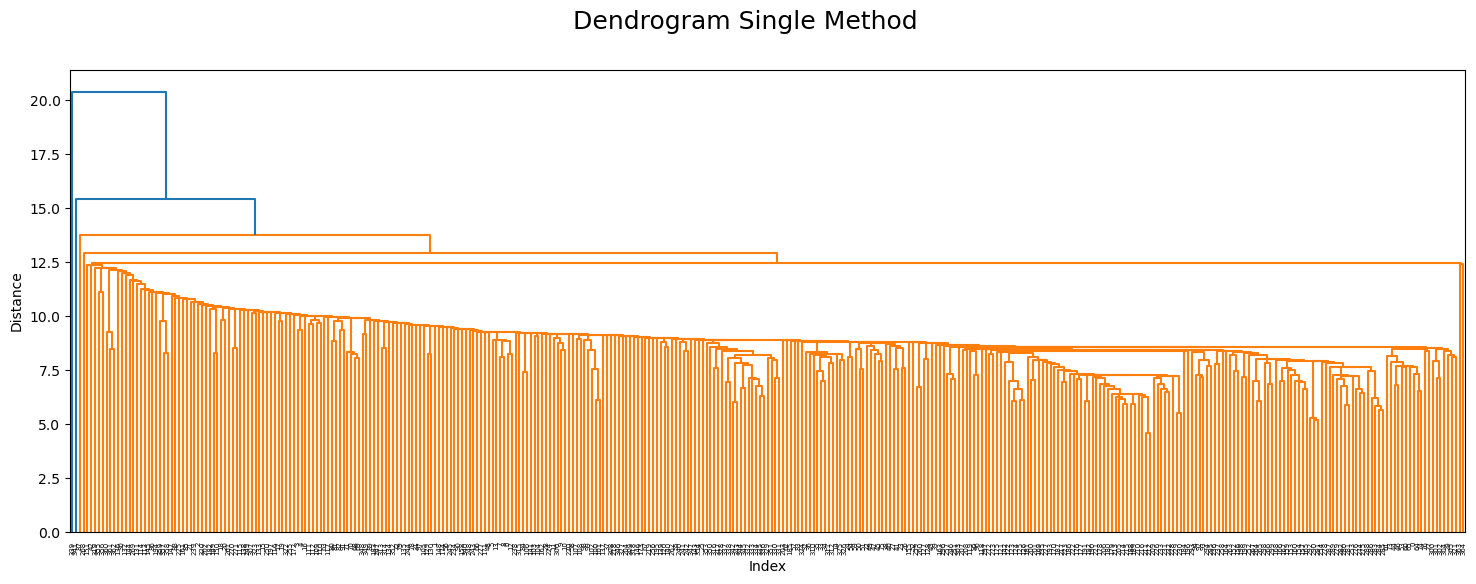

In [141]:
dist_sin_SM = linkage(df_scaled.loc[:,
                        cols],method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin_SM, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

### 3.2. Complete Method

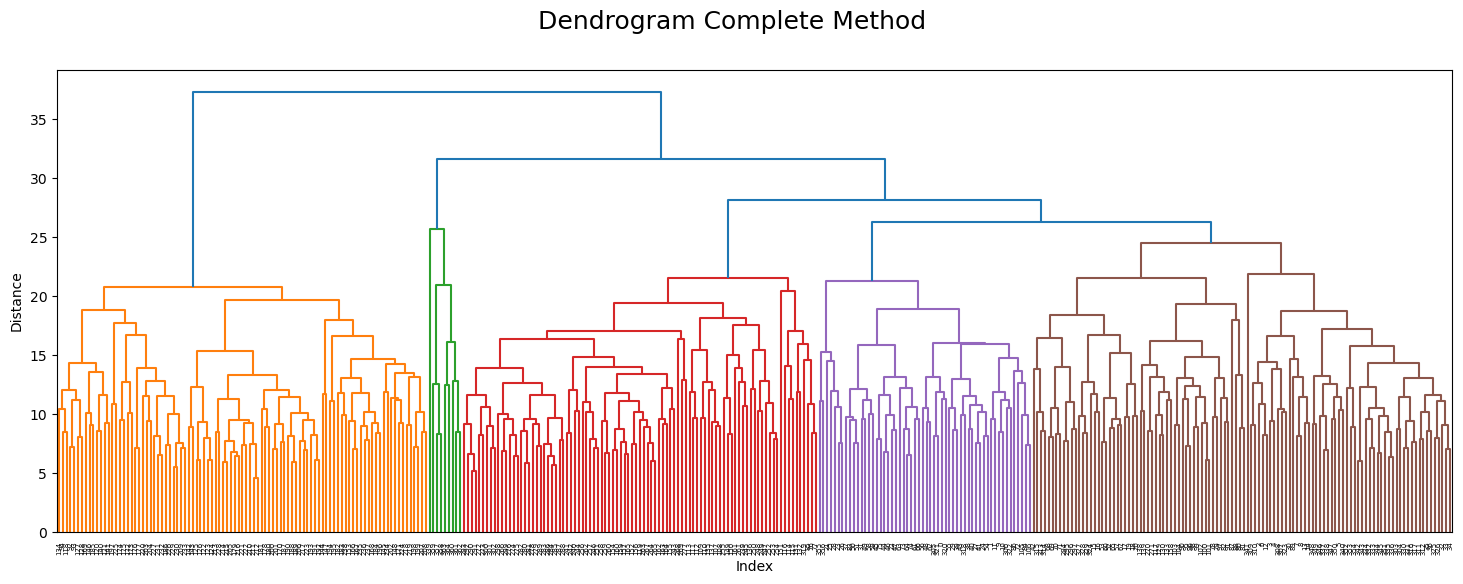

In [142]:
dist_sin_CM = linkage(df_scaled.loc[:,
                        cols],method="complete")
plt.figure(figsize=(18,6))
dendrogram(dist_sin_CM, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

### 3.3. Average Method

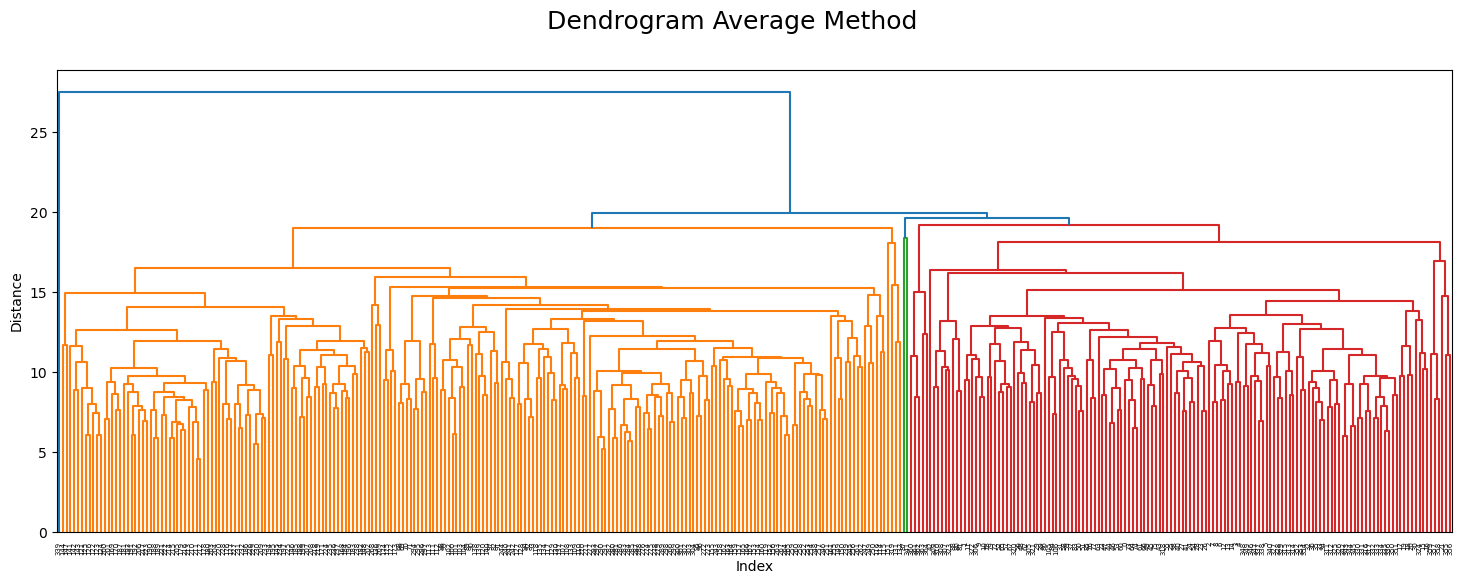

In [143]:
dist_sin_AM = linkage(df_scaled.loc[:,
                        cols],method="average")
plt.figure(figsize=(18,6))
dendrogram(dist_sin_AM, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

### 3.4. Ward Method

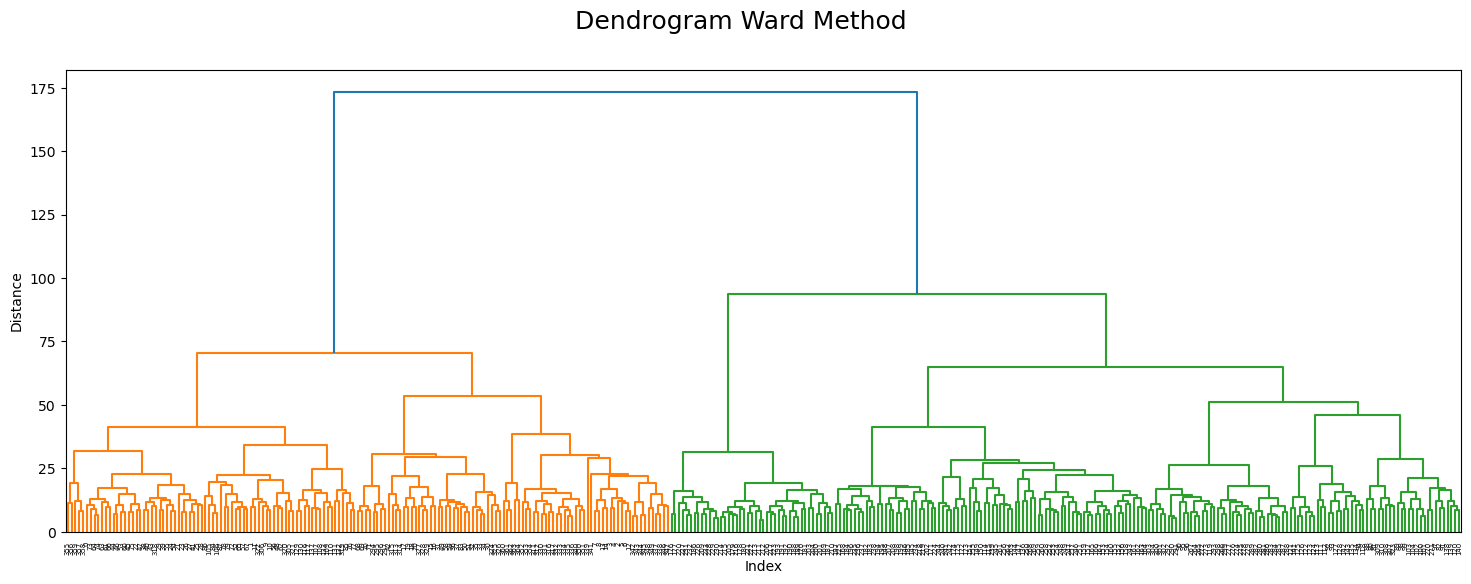

In [144]:
dist_sin_WM = linkage(df_scaled.loc[:,
                        cols],method="ward")
plt.figure(figsize=(18,6))
dendrogram(dist_sin_WM, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

## 4. Principal Component Analysis

In [145]:
#Run the PCA model, reducing to 11 components (for temp_min, temp_mean, temp_max, sunshine, snowdepth, precipitation, global_radiation, pressure, humidity, cloud_cover, wind_speed)
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(df_scaled)
principalComponents

array([[-10.17730966,   5.25488995,   4.20808957, ...,  -2.8842381 ,
         -1.04609593,   1.70890556],
       [-10.09278098,  -0.32378617,   2.04395826, ...,   0.41655501,
         -2.79704462,   1.87865196],
       [-11.77925325,  -6.75256181,   0.33017634, ...,   2.55303228,
         -1.39076319,   1.46454014],
       ...,
       [-14.28513624,  -6.5764624 ,   6.20422808, ...,   0.09586837,
          0.20920683,   4.96437887],
       [-14.01943756,  -0.02676856,   6.01782813, ...,   0.29291961,
          2.47837458,   1.30535414],
       [-13.72697789,   3.97821929,   2.77902651, ...,  -1.75783998,
          2.78129646,   2.25690015]])

In [149]:
#Make a dataframe of the new components
dfPCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2' , 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11'])
dfPCA

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,-10.177310,5.254890,4.208090,-1.352357,1.483066,-2.083483,-0.123808,-1.731554,-2.884238,-1.046096,1.708906
1,-10.092781,-0.323786,2.043958,-0.812639,4.022998,-0.141327,-1.208320,-0.313468,0.416555,-2.797045,1.878652
2,-11.779253,-6.752562,0.330176,-3.237738,1.587790,3.099763,-0.136223,0.131725,2.553032,-1.390763,1.464540
3,-12.475182,-10.105804,2.179174,-1.244314,-0.764870,2.706802,1.828355,-1.893065,0.358688,1.783982,0.783286
4,-12.358289,-7.414301,2.877786,-0.196308,-0.942544,0.447708,0.476327,0.798314,0.930177,2.272953,-0.933573
...,...,...,...,...,...,...,...,...,...,...,...
360,-14.320684,-2.332467,6.685505,-4.502162,-6.402453,5.456001,1.634554,0.120094,0.315274,0.115077,5.805275
361,-14.010623,-5.861076,6.273643,-0.538421,-4.396916,5.018394,-0.367928,-0.026223,1.289807,0.513716,6.489852
362,-14.285136,-6.576462,6.204228,1.253777,-5.493158,2.461811,-1.401335,-0.049021,0.095868,0.209207,4.964379
363,-14.019438,-0.026769,6.017828,3.167265,-7.374161,3.927849,1.401182,0.955468,0.292920,2.478375,1.305354


In [153]:
#Export in csv format
dfPCA.to_csv(os.path.join(path, 'Task2_1.csv'))